**Problem statement: Create a classification model to predict the sentiment** **either (Positive or Negative) based on Covid Tweets**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

**1)Read the dataset with encoding parameter set to ‘latin1’**

In [2]:
data = pd.read_csv("Corona_NLP.csv",encoding='latin1')


In [3]:
df=pd.DataFrame(data)

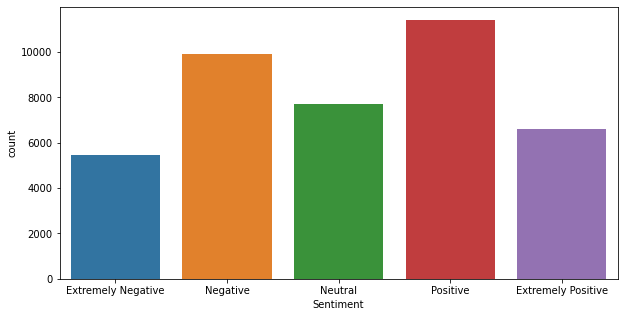

In [4]:
plt.figure(figsize=(10,5))
sns.countplot(x='Sentiment', data=df, order=['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive'], )


**2)Remove handle null values (if any).**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


**3)Preprocess the Covid tweets based on the following parameter:**       
a) Tokenizing words                                                
b) Convert words to lower case                                         
c) Removing Punctuations                                                          
d) Removing Stop words                                                           
e) Stemming or lemmatizing the words

**Removing Punctuations**

In [6]:
reg = re.compile("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z t])|(w+://S+)")
tweet = []
for i in df["OriginalTweet"]:
  tweet.append(reg.sub(" ", i))
df = pd.concat([df, pd.DataFrame(tweet, columns=["ProcessedTweet"])], axis=1, sort=False)

In [7]:
df.head()


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,ProcessedTweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,Gahan https t co iFz9FAn2Pa and https ...
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths to give elde...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,Me ready to go at supermarket during the ou...


**Convert words to lower case**

In [8]:
df['ProcessedTweet']=[tweet.lower() for tweet in df['ProcessedTweet']]

**Removing Stop words**
&



**Tokenizing words**

In [9]:
stop_words=stopwords.words('english')

In [10]:
def remove_stopwords(tw):
  tw_tokenised=word_tokenize(tw)
  new_tw=" ".join([i for i in tw_tokenised if i not in stop_words])
  return new_tw

df['ProcessedTweet']=[remove_stopwords(r) for r in df['ProcessedTweet']]

In [11]:
df['ProcessedTweet']

0        gahan https co ifz9fan2pa https co xx6ghgfzcc ...
1        advice talk neighbours family exchange phone n...
2        coronavirus australia woolworths give elderly ...
3        food stock one empty please panic enough food ...
4        ready go supermarket outbreak paranoid food st...
                               ...                        
41152    airline pilots offering stock supermarket shel...
41153    response complaint provided citing covid 19 re...
41154    know getting tough rationing toilet paper mart...
41155             wrong smell hand sanitizer starting turn
41156    well new used rift going 700 00 amazon rn alth...
Name: ProcessedTweet, Length: 41157, dtype: object

 **Stemming or lemmatizing the words**

In [12]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [13]:
from nltk.corpus.reader.wordnet import WordNetError
lemmatizer=WordNetLemmatizer()
def nltk_tag_to_wordnet_tag(nltk_tag):
  if nltk_tag.startswith('J'):
    return wordnet.ADJ
  elif nltk_tag.startswith('V'):
    return wordnet.VERB
  elif nltk_tag.startswith('N'):
    return wordnet.NOUN
  elif nltk_tag.startswith('R'):
    return wordnet.ADV
  else:
    None


def lemmatize_sentence(sentence):
  nltk_tagged=nltk.pos_tag(nltk.word_tokenize(sentence))
  word_net_tagged=map(lambda x:(x[0],nltk_tag_to_wordnet_tag(x[1])),nltk_tagged)
  lemmatized_sentence=[]
  for word,tag in word_net_tagged:
    if tag is None:
      lemmatized_sentence.append(word)
    else:
      lemmatized_sentence.append(lemmatizer.lemmatize(word,tag))
  return " ".join(lemmatized_sentence)


In [14]:
df['ProcessedTweet']=df['ProcessedTweet'].apply(lambda x:lemmatize_sentence(x))

In [15]:
df['ProcessedTweet']

0        gahan http co ifz9fan2pa http co xx6ghgfzcc ht...
1        advice talk neighbours family exchange phone n...
2        coronavirus australia woolworths give elderly ...
3        food stock one empty please panic enough food ...
4        ready go supermarket outbreak paranoid food st...
                               ...                        
41152    airline pilot offer stock supermarket shelf lo...
41153    response complaint provide cite covid 19 relat...
41154    know get tough rationing toilet paper martinsv...
41155                wrong smell hand sanitizer start turn
41156    well new use rift go 700 00 amazon rn although...
Name: ProcessedTweet, Length: 41157, dtype: object

**Convert the 'Extremely Positive' and 'Extremely Negative' Sentiments to 'Positive' and
'Negative' sentiments respectively**


In [16]:
df['Sentiment'].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [17]:
df['Sentiment']=df.Sentiment.map({'Neutral':1, 'Positive':2, 'Extremely Negative':0, 'Negative':0,
       'Extremely Positive':2})

In [18]:
df['Sentiment'].head()

0    1
1    2
2    2
3    2
4    0
Name: Sentiment, dtype: int64

**Transform the words into vectors**

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
X=tfidf.fit_transform(df.ProcessedTweet).toarray()
y=df['Sentiment'].values

**Split data into training and test data.**

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=9)

In [21]:
X_train.shape, X_test.shape

((32925, 3000), (8232, 3000))

7)Apply the following models on the training dataset and generate the predicted value for the testdataset                                                       
a) Multinomial Naïve Bayes Classification                                                                   
b) SVM Classification                                                              
c) KNN Classification                                                            
8)Predict the Sentiment for test data                                             
9)Compute Confusion matrix and classification report for each of these models 

In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB

**KNN Classification**

In [23]:
knn=KNeighborsClassifier(n_neighbors=800)
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)
print(knn_pred)
knn_score=accuracy_score(knn_pred,y_test)
print('KNN Accuracy',knn_score)
print('KNN Confusion Matrix\n',confusion_matrix(knn_pred,y_test))
print('KNN Classification Report\n',classification_report(knn_pred,y_test))
  

[2 2 2 ... 0 2 2]
KNN Accuracy 0.625485908649174
KNN Confusion Matrix
 [[1671  241  344]
 [ 224  495  189]
 [1242  843 2983]]
KNN Classification Report
               precision    recall  f1-score   support

           0       0.53      0.74      0.62      2256
           1       0.31      0.55      0.40       908
           2       0.85      0.59      0.70      5068

    accuracy                           0.63      8232
   macro avg       0.56      0.62      0.57      8232
weighted avg       0.70      0.63      0.64      8232



**Multinomial Naïve Bayes Classification**

In [24]:
NBM=MultinomialNB()
NBM.fit(X_train,y_train)
NBM_pred=NBM.predict(X_test)
print(NBM_pred)
NBM_score=accuracy_score(NBM_pred,y_test)
print('NBM Accuracy',NBM_score)
print('NBM Confusion Matrix\n',confusion_matrix(NBM_pred,y_test))
print('NBM Classification Report\n',classification_report(NBM_pred,y_test))
  

[2 2 2 ... 0 2 0]
NBM Accuracy 0.6768707482993197
NBM Confusion Matrix
 [[2239  398  456]
 [  51  321   48]
 [ 847  860 3012]]
NBM Classification Report
               precision    recall  f1-score   support

           0       0.71      0.72      0.72      3093
           1       0.20      0.76      0.32       420
           2       0.86      0.64      0.73      4719

    accuracy                           0.68      8232
   macro avg       0.59      0.71      0.59      8232
weighted avg       0.77      0.68      0.71      8232



**SVM Classification**

In [26]:
from sklearn.svm import LinearSVC
svm_lr=LinearSVC()
svm_lr.fit(X_train,y_train)
svmlr_pred=svm_lr.predict(X_test)
svmlr_pred
svmlr_score=accuracy_score(svmlr_pred,y_test)
print('SVC_linear Accuracy',svmlr_score)
print('SVC_linear confusion_matrix\n',confusion_matrix(svmlr_pred,y_test))
print('SVC_linear classification_report\n', classification_report(svmlr_pred,y_test))


SVC_linear Accuracy 0.8130466472303207
SVC_linear confusion_matrix
 [[2526  193  330]
 [ 209 1136  155]
 [ 402  250 3031]]
SVC_linear classification_report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      3049
           1       0.72      0.76      0.74      1500
           2       0.86      0.82      0.84      3683

    accuracy                           0.81      8232
   macro avg       0.80      0.80      0.80      8232
weighted avg       0.82      0.81      0.81      8232



# **Best Model selection based on accuracy**

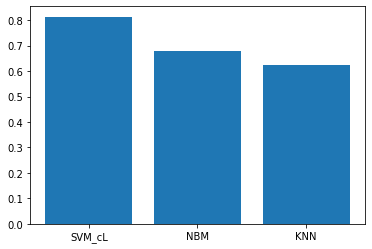

In [27]:
Scores=[svmlr_score,NBM_score,knn_score]
plt.bar(['SVM_cL','NBM','KNN'],Scores)
plt.show()

# **THE MODEL WITH THE BEST ACCURACY IS *SVM Classification* .** 